# Data Analysis

In [27]:
import os
import numpy as np
import pandas as pd

from fitparse import FitFile
import gpxpy
import gpxpy.gpx

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gmplot

## Load Data

### Arduino Device

In [28]:
data_path = "../arduino_device/data"
date = "2023_03_07"
rec = 9

# Acceleration data
acc_data = pd.read_csv(data_path + "/" + date + "/DATA" + str(rec) + ".TXT", sep=";", header=1, names=["ax", "ay", "az"])

### Application

### Helbert

#### Using FIT files (WARNING)

In [29]:
# path = "path_1"
# acc_file = None
# gps_file = None
# for f in os.listdir(path):
#     if f.endswith(".csv"):
#         acc_file = f
#     if f.endswith(".FIT"):
#         gps_file = f

# # Acceleration data
# acc_data = pd.read_csv(path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# # GPS data

# def semicircles2rad(list):
#     """Convert semicircle data from FIT file to dms data

#     Args:
#         list (list): List of semicircle values

#     Returns:
#         list: list of dms values
#     """
#     const = 180 / 2**31
#     for i in range(len(list)-1):
#         list[i] = list[i] * const
#     return list


# time = []
# alt = []
# lat = []
# long = []
# units = {"alt" : "", "lat": "", "long": ""}

# gps_fit_file = fitfile = FitFile(path + "/" + gps_file)

# for record in fitfile.get_messages("record"):
#     for record_data in record:
#         if record_data.name == "timestamp":
#             time.append(record_data.value)
#         if record_data.name == "altitude":
#             alt.append(record_data.value)
#             if units["alt"] == "":
#                 units["alt"] = record_data.units
#         if record_data.name == "position_lat":
#             lat.append(record_data.value)
#             if units["lat"] == "":
#                 units["lat"] = record_data.units
#         if record_data.name == "position_long":
#             long.append(record_data.value)
#             if units["long"] == "":
#                 units["long"] = record_data.units

# lat = semicircles2rad(lat)
# long = semicircles2rad(long)
# gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "lat", "long", "alt"])


#### Using GPX Files

In [30]:
data_path = "../helbert/data"
date = "2023_03_02"
path = "path_4"
acc_file = None
gps_file = None
for f in os.listdir(data_path + "/" + date + "/" + path):
    if f.endswith(".csv"):
        acc_file = f
    if f.endswith(".gpx"):
        gps_file = f

# Acceleration data
acc_data = pd.read_csv(data_path + "/" + date + "/" + path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# GPS data
gpx_file = open(data_path + "/" + date + "/" + path + "/" + gps_file, "r")
gpx = gpxpy.parse(gpx_file)

time = []
lat = []
long = []
alt = []
units = {"alt" : "?", "lat": "deg", "long": "deg"}
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print("{0} Point at ({1},{2}) -> {3}".format(point.time, point.latitude, point.longitude, point.elevation))
            time.append(point.time)
            lat.append(point.latitude)
            long.append(point.longitude)
            alt.append(point.elevation)
gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "lat", "long", "alt"])


2023-02-28 10:42:06+00:00 Point at (48.39350167661905,7.407720247283578) -> None
2023-02-28 10:42:34+00:00 Point at (48.39354543015361,7.4077097699046135) -> None
2023-02-28 10:42:35+00:00 Point at (48.39356864802539,7.407719576731324) -> None
2023-02-28 10:42:37+00:00 Point at (48.393599325791,7.407748913392425) -> None
2023-02-28 10:42:39+00:00 Point at (48.39361692778766,7.407802809029818) -> None
2023-02-28 10:42:44+00:00 Point at (48.39348826557398,7.408041525632143) -> None
2023-02-28 10:42:48+00:00 Point at (48.39328994974494,7.408184185624123) -> None
2023-02-28 10:42:50+00:00 Point at (48.3930950704962,7.408296586945653) -> None
2023-02-28 10:42:52+00:00 Point at (48.39288795366883,7.408408066257834) -> None
2023-02-28 10:42:53+00:00 Point at (48.39279348962009,7.408489873632789) -> None
2023-02-28 10:42:55+00:00 Point at (48.39264345355332,7.408708641305566) -> None
2023-02-28 10:42:57+00:00 Point at (48.39258385822177,7.409029332920909) -> None
2023-02-28 10:42:59+00:00 Poin

## Acceleration Data

In [31]:
acc_data

time      ax      ay      az   norm
0      11:41:59:3080  0,0578  0,4279  0,9532  1,046
1      11:41:59:3110  0,0640  0,4199  0,9443  1,035
2      11:41:59:3130  0,0734  0,4136  0,9332  1,023
3      11:41:59:3150  0,0761  0,4122  0,9277  1,017
4      11:41:59:3180  0,0715  0,4173  0,9261  1,018
...              ...     ...     ...     ...    ...
29800  12:14:18:5010  0,0176  0,5329  0,8640  1,017
29801  12:14:18:5100  0,0177  0,5344  0,8529  1,008
29802  12:14:18:5140  0,0177  0,5307  0,8460  1,000
29803  12:14:18:5170  0,0195  0,5317  0,8454  1,000
29804  12:14:18:5210  0,0173  0,5364  0,8486  1,006

[29805 rows x 5 columns]

In [32]:
acc_data.describe()

time      ax      ay      az   norm
count           29805   29805   29805   29805  29805
unique          29805    5109    5021    4865    830
top     11:41:59:3080  0,0433  0,0903  1,0095  1,018
freq                1      34      36      44    291

In [33]:
# acc_data.hist(column="ax")

In [34]:
acc_data.isna().sum()

time    0
ax      0
ay      0
az      0
norm    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

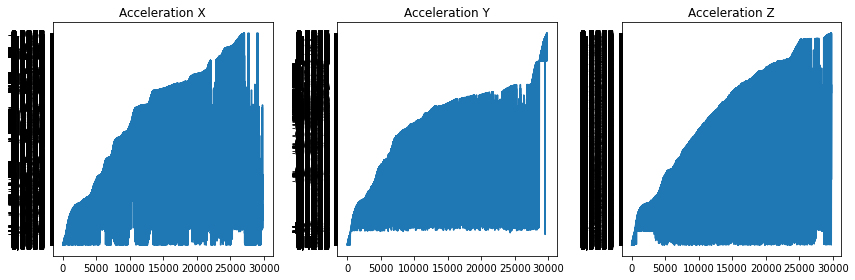

In [35]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

In [36]:
def single_graph(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

def triple_graph(df):
    col_num = 1
    fig = make_subplots(rows=1, cols=3)
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col), row=1, col=col_num)
      col_num += 1
    fig.update_layout(height=1080/2, width=1920/2, title_text="Test")
    return fig

In [37]:
# fig = single_graph(acc_data[["ax", "ay", "az", "norm"]])
fig = single_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_1.html", full_html=False, include_plotlyjs="cdn")
fig.show()

In [38]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()

## GPS Data

In [39]:
gps_data

time        lat      long   alt
0    2023-02-28 10:42:06+00:00  48.393502  7.407720  None
1    2023-02-28 10:42:34+00:00  48.393545  7.407710  None
2    2023-02-28 10:42:35+00:00  48.393569  7.407720  None
3    2023-02-28 10:42:37+00:00  48.393599  7.407749  None
4    2023-02-28 10:42:39+00:00  48.393617  7.407803  None
...                        ...        ...       ...   ...
1472 2023-02-28 11:13:35+00:00  48.571852  7.736515  None
1473 2023-02-28 11:13:42+00:00  48.571964  7.736392  None
1474 2023-02-28 11:13:45+00:00  48.571991  7.736398  None
1475 2023-02-28 11:13:55+00:00  48.572001  7.736381  None
1476 2023-02-28 11:14:04+00:00  48.572001  7.736381  None

[1477 rows x 4 columns]

In [40]:
units # Check if data has been converted when loading

{'alt': '?', 'lat': 'deg', 'long': 'deg'}

In [41]:
gps_data.describe()

lat         long
count  1477.000000  1477.000000
mean     48.480348     7.576203
std       0.060591     0.104462
min      48.386182     7.407710
25%      48.418610     7.484723
50%      48.497912     7.562225
75%      48.526581     7.675723
max      48.572001     7.738964

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

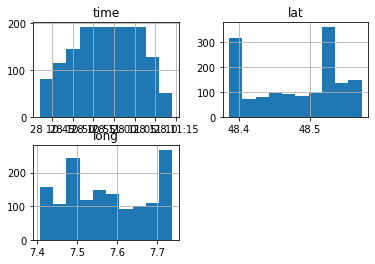

In [42]:
gps_data.hist()

In [43]:
gps_data.isna().sum()

time       0
lat        0
long       0
alt     1477
dtype: int64

In [44]:
min_lat, max_lat = min(gps_data["lat"]), max(gps_data["lat"])
min_lon, max_lon = min(gps_data["long"]), max(gps_data["long"])
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2,
                                min_lon + (max_lon - min_lon) / 2,
                                12)
mymap.plot(gps_data["lat"], gps_data["long"], "red", edge_width=2)
mymap.draw("data_analysis_gps.html")

In [45]:
import webbrowser
webbrowser.open("data_analysis_gps.html")

True

## Tests

In [46]:
from IPython.display import display, HTML
display(src="data_analysis_gps.html")

In [47]:
from IPython.display import IFrame
IFrame(src="data_analysis_gps.html", width=700, height=600)